<a href="https://colab.research.google.com/github/omarmx9/ML_repository/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from scipy import stats


# read data

In [ ]:
data = pd.read_csv('Stroke.csv')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.duplicated().sum()

0

#  Label Encoding Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the categorical column
data['gender'] = le.fit_transform(data['gender'])
data['age'] = le.fit_transform(data['age'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [ ]:
data = data.drop("id", axis =1)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,228.69,36.6,1,1
1,0,82,0,0,1,3,0,202.21,NaN,2,1
2,1,101,0,1,1,2,0,105.92,32.5,2,1
3,0,70,0,0,1,2,1,171.23,34.4,3,1
4,0,100,1,0,1,3,0,174.12,24.0,2,1


# K-NN filling

In [ ]:
from sklearn.impute import KNNImputer

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=4)

# Perform the imputation; note that KNN imputer returns a numpy array
imputed_data = knn_imputer.fit_transform(data)

# Convert the numpy array back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=data.columns)

imputed_df.head()
data = imputed_df

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# correlation

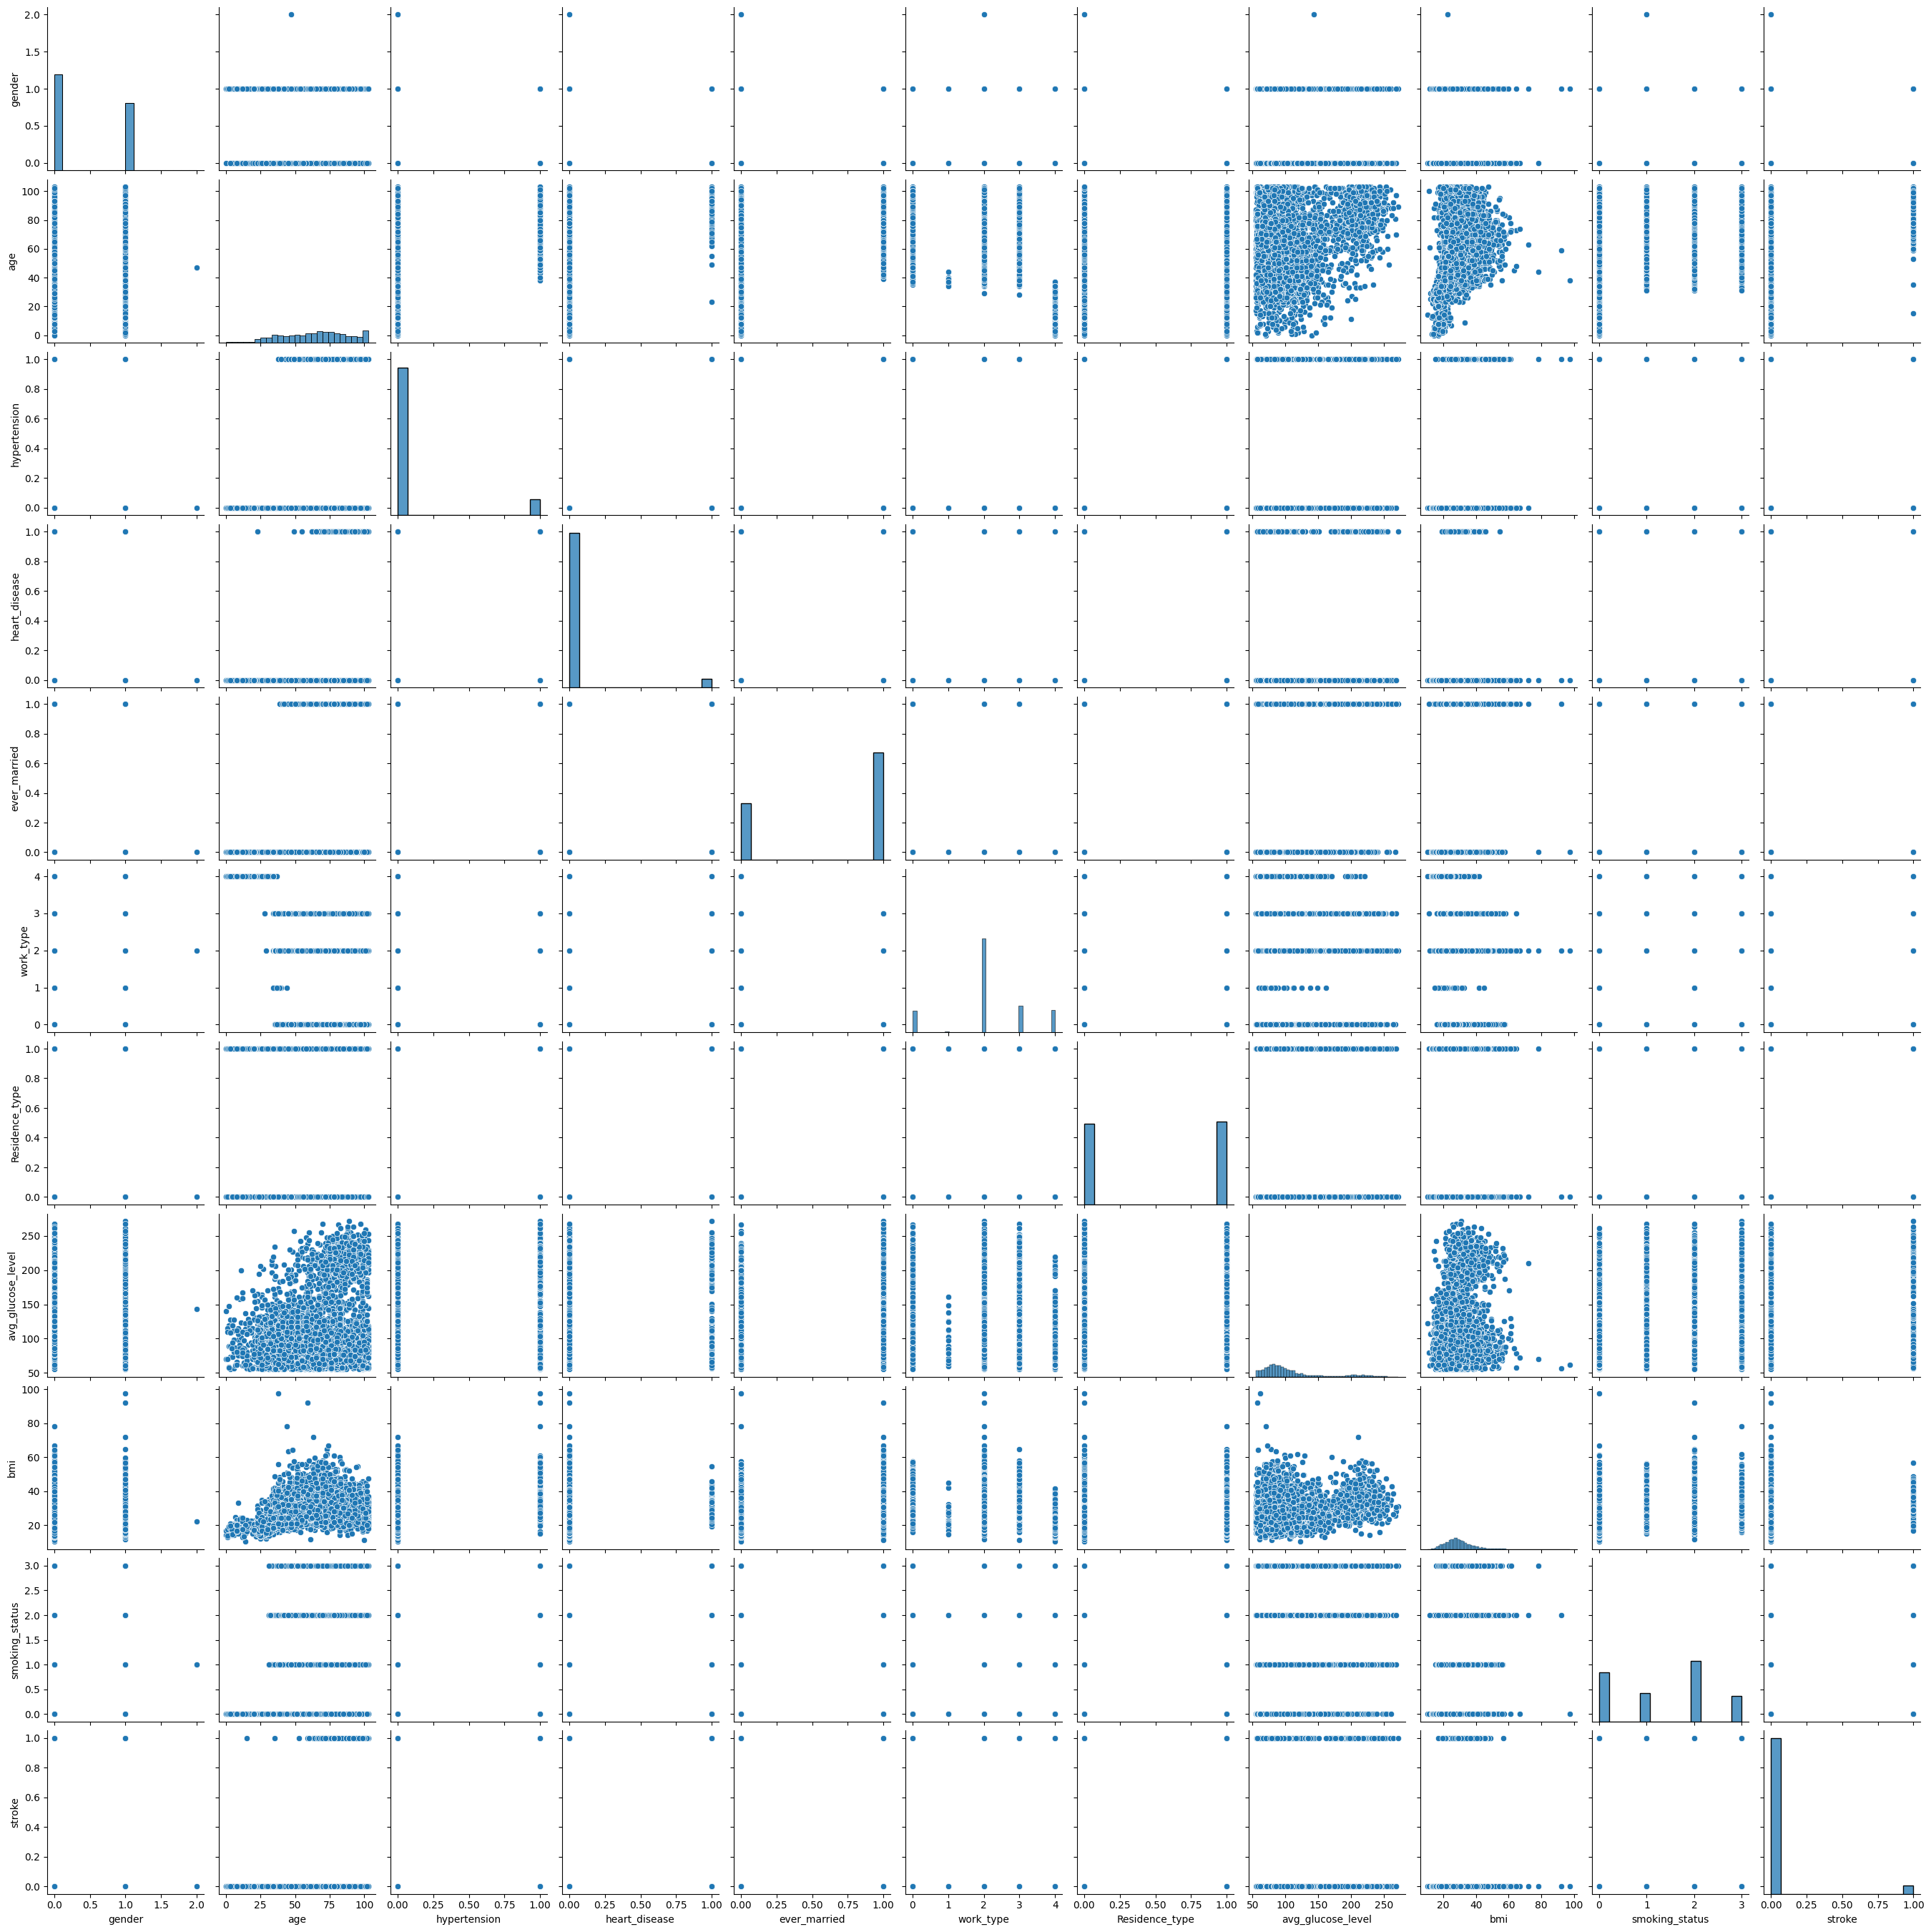

In [ ]:
sns.pairplot(data)

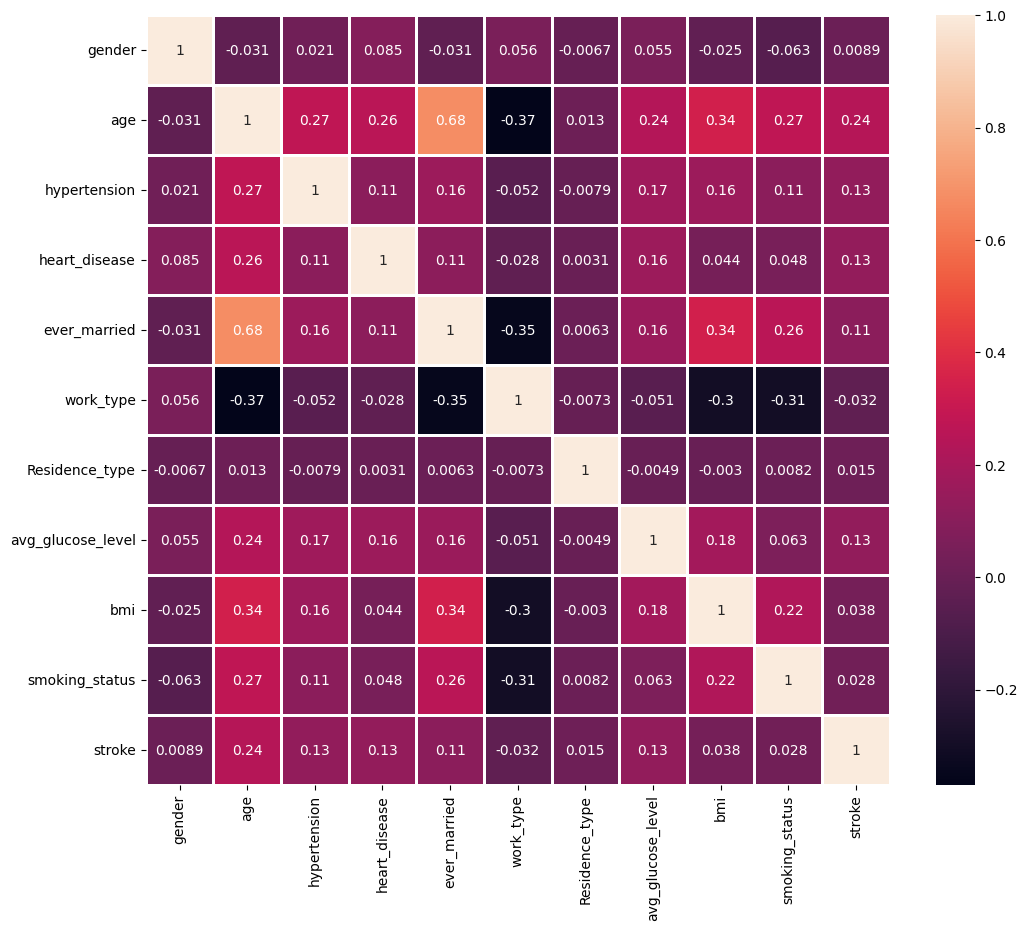

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,  annot=True, linewidth=2)
plt.show()

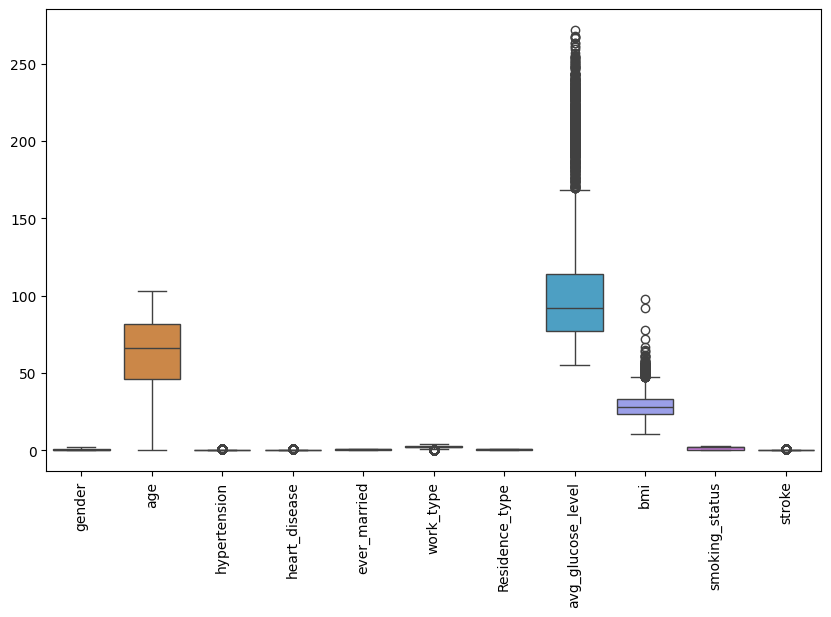

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(data)
plt.xticks(rotation =90)
plt.show()

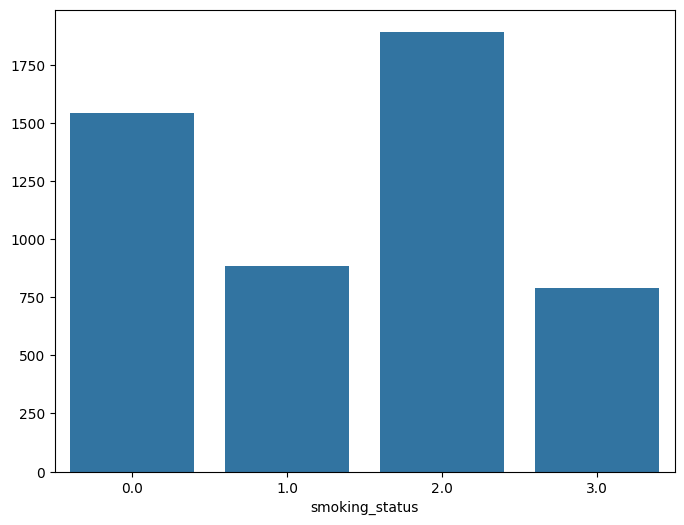

In [ ]:
Smoking_count = data['smoking_status'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x =Smoking_count.index, y=Smoking_count.values)
plt.show()

# OUTLIERS Handling

In [ ]:
p5 = np.percentile(data.avg_glucose_level,25)
p95 = np.percentile(data.avg_glucose_level,75)

winsorized_data = np.copy(data.avg_glucose_level)
winsorized_data[winsorized_data < p5]=p5
winsorized_data[winsorized_data > p95]=p95
data.avg_glucose_level = winsorized_data

<Axes: ylabel='avg_glucose_level'>

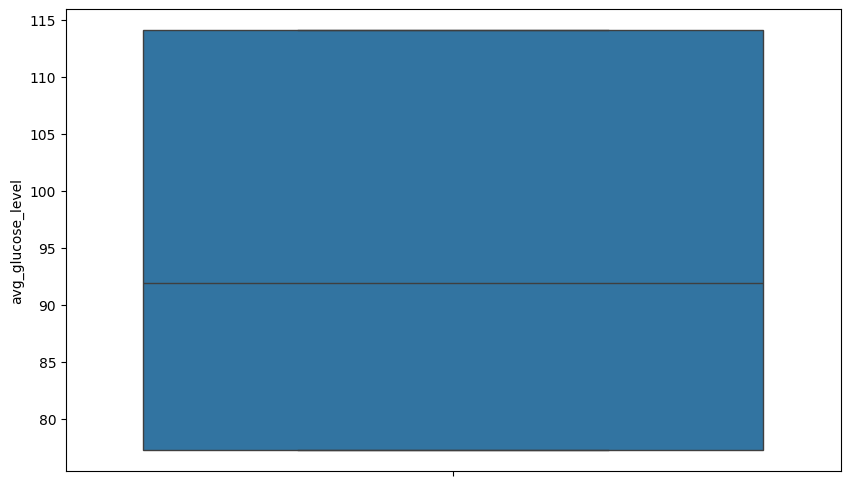

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data.avg_glucose_level)

In [ ]:
p5 = np.percentile(data.bmi,25)
p95 = np.percentile(data.bmi,75)

winsorized_data = np.copy(data.bmi)
winsorized_data[winsorized_data < p5]=p5
winsorized_data[winsorized_data > p95]=p95
data.bmi = winsorized_data

<Axes: ylabel='bmi'>

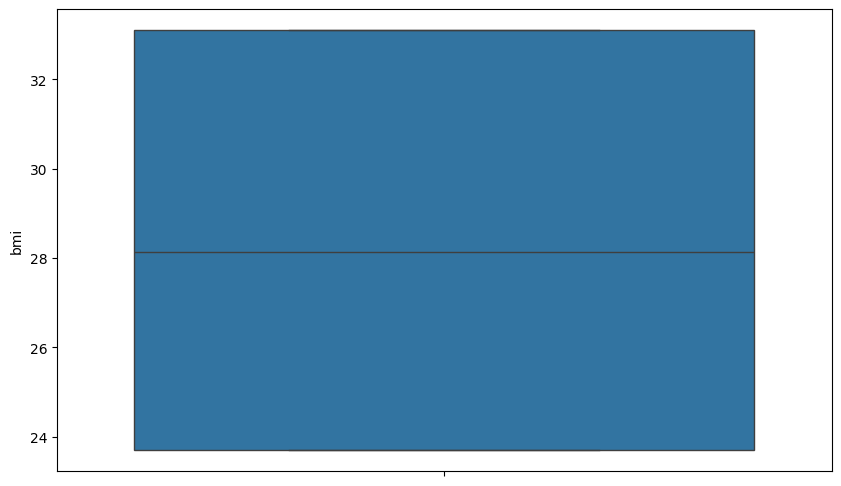

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data.bmi)

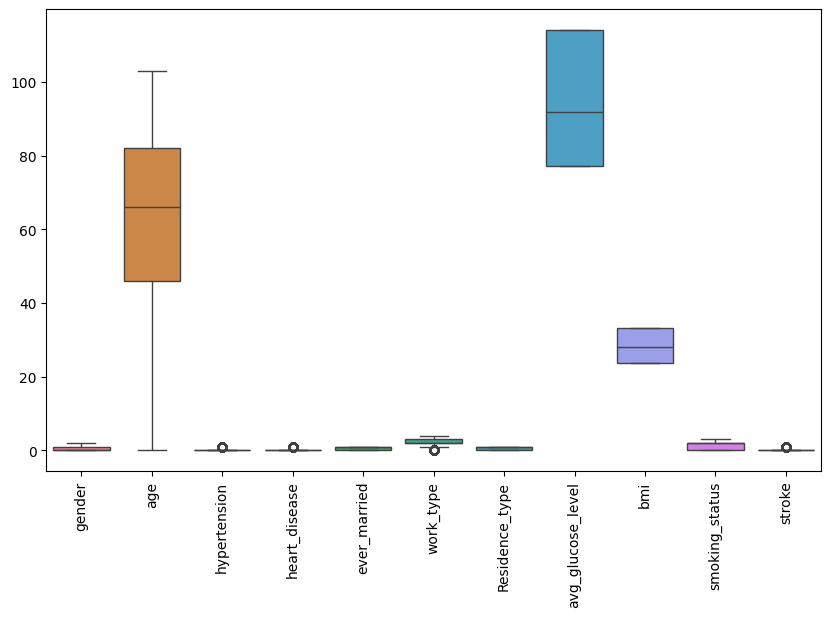

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(data)
plt.xticks(rotation =90)
plt.show()


# Stacking

In [ ]:
X =data.drop('stroke', axis=1)
y =data['stroke']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y__smote = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(X_smote, y__smote, test_size=0.3 , random_state=42)


In [ ]:
from sklearn.ensemble import StackingClassifier ,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define the base learners and the meta-learner
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(random_state=42, probability=True))
]
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)


# Train the stacked model
stacking_classifier.fit(x_train, y_train)

# Evaluate the model
print("Stacking Classifier accuracy:", stacking_classifier.score(x_test, y_test))

Stacking Classifier accuracy: 0.9605759341789509


# SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
model = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')

# Train the model on the training data
model.fit(x_train, y_train)
# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],  'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   1.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.685 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   1.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   1.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=   1.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.844 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.782 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(x_test)
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1457
         1.0       0.98      0.94      0.96      1460

    accuracy                           0.96      2917
   macro avg       0.96      0.96      0.96      2917
weighted avg       0.96      0.96      0.96      2917



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict and evaluate
RF_predictions = y_pred
print("RF Classification Report:")
print(classification_report(y_test, RF_predictions))

RF Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1457
         1.0       0.99      0.95      0.97      1460

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



In [ ]:
# Confusion Matrix for each model
print("RF Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

RF Confusion Matrix:
[[1439   18]
 [  78 1382]]


# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict and evaluate
knn_predictions = knn.predict(x_test)
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      1457
         1.0       0.84      0.98      0.91      1460

    accuracy                           0.90      2917
   macro avg       0.91      0.90      0.90      2917
weighted avg       0.91      0.90      0.90      2917



In [ ]:
# Confusion Matrix for each model
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

KNN Confusion Matrix:
[[1192  265]
 [  29 1431]]
